In [42]:
import pandas as pd
import numpy as np
import time
import normet
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [43]:
df=pd.read_csv(r'data/MY1.csv',parse_dates=['date'],index_col='date')

In [44]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [45]:
era=pd.read_csv(r'data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [46]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [47]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [48]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [49]:
automl=normet.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-07-19 13:12:05 : Training AutoML...
2024-07-19 13:13:38 : Best model is lgbm with best model parameters of {'n_estimators': 527, 'num_leaves': 57, 'min_child_samples': 19, 'learning_rate': 0.10029209493914669, 'log_max_bin': 10, 'colsample_bytree': 0.777659907533841, 'reg_alpha': 5.054157418960246, 'reg_lambda': 0.023089272254781048}


In [50]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: lgbm
Best model parameters: {'n_estimators': 527, 'num_leaves': 57, 'min_child_samples': 19, 'learning_rate': 0.10029209493914669, 'log_max_bin': 10, 'colsample_bytree': 0.777659907533841, 'reg_alpha': 5.054157418960246, 'reg_lambda': 0.023089272254781048}


In [51]:
automl.best_result

{'pred_time': 8.800688149041211e-06,
 'wall_clock_time': 90.07210111618042,
 'metric_for_logging': {'pred_time': 8.800688149041211e-06},
 'val_loss': 0.14144172187127574,
 'training_iteration': 1,
 'config': {'n_estimators': 527,
  'num_leaves': 57,
  'min_child_samples': 19,
  'learning_rate': 0.10029209493914669,
  'log_max_bin': 10,
  'colsample_bytree': 0.777659907533841,
  'reg_alpha': 5.054157418960246,
  'reg_lambda': 0.023089272254781048},
 'config/n_estimators': 527,
 'config/num_leaves': 57,
 'config/min_child_samples': 19,
 'config/learning_rate': 0.10029209493914669,
 'config/log_max_bin': 10,
 'config/colsample_bytree': 0.777659907533841,
 'config/reg_alpha': 5.054157418960246,
 'config/reg_lambda': 0.023089272254781048,
 'experiment_tag': 'exp',
 'time_total_s': 6.174514055252075}

In [52]:
automl.feature_importances_

array([ 572, 2938, 3102, 2352, 2174, 2877, 2788, 1925, 2501, 1494, 2634,
       2237,  448, 1470], dtype=int32)

In [53]:
automl.feature_names_in_

['weekday',
 'u10',
 'v10',
 'd2m',
 't2m',
 'blh',
 'sp',
 'ssrd',
 'tcc',
 'tp',
 'rh2m',
 'date_unix',
 'day_julian',
 'hour']

In [54]:
mod_stats=normet.modStats(df1a,automl)

In [55]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,4780,0.983891,-0.000274,0.372178,-0.000030,0.040843,0.488406,0.998277,***,0.932018,0.966009,0.996557,training
1,1593,0.903327,0.055071,1.952997,0.005986,0.212284,2.770331,0.937411,***,0.644299,0.822150,0.878740,testing
2,6373,0.963753,0.013560,0.767321,0.001484,0.084005,1.448205,0.984140,***,0.859960,0.929980,0.968532,all


In [56]:
df1a

,rowid,blh,value,ssrd,v10,t2m,tp,d2m,tcc,rh2m,sp,u10,date,date_unix,day_julian,weekday,hour,set
0,0,384.209053,58.1,-1.164153e-10,1.545010,278.394725,0.000008,277.183465,0.650958,91.884130,102252.303312,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,353.220263,43.2,-1.164153e-10,1.282742,277.772899,0.000002,276.695430,0.603699,92.715877,102211.168636,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,255.911846,43.0,-1.164153e-10,0.758730,277.463419,0.000005,276.505662,0.710378,93.485560,102174.855967,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,191.375560,42.8,-1.164153e-10,0.509013,277.305813,0.000005,276.412816,0.837765,93.906363,102166.786485,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,151.780210,36.8,-1.164153e-10,0.607069,277.478941,0.000003,276.553051,0.819103,93.696878,102142.578039,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,476.945688,11.7,-5.820766e-11,-1.945195,273.557442,0.000000,272.197565,0.918149,90.582979,99902.506413,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,486.665851,11.0,-5.820766e-11,-2.102732,273.629146,0.000000,272.171041,0.839639,89.939908,99947.625909,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,489.355002,15.3,-5.820766e-11,-1.933668,273.470592,0.000000,272.087408,0.739354,90.422188,100000.215520,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,40.714872,17.1,-5.820766e-11,-0.583816,272.926062,0.000000,272.235319,0.643753,95.088677,100042.844978,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [57]:
start_time = time.time()
df_dew1=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-19 13:13:38 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:14:03 : Aggregating 300 predictions...
Execution time: 25.26 seconds


In [58]:
df_dew1.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,23.039445
2020-01-01 01:00:00,43.2,22.209654
2020-01-01 02:00:00,43.0,21.546160
2020-01-01 03:00:00,42.8,21.412184
2020-01-01 04:00:00,36.8,20.603074


In [59]:
start_time = time.time()
df_dew=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=False)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-19 13:14:03 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:14:28 : Concatenated 300 predictions...
Execution time: 25.21 seconds


In [60]:
df_dew.head()

,observed,3654,5434,11323,12849,12939,16589,17657,18205,21582,...,977967,978147,979812,980024,980276,981796,983486,993973,996392,996615
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.729556,16.547561,17.434020,16.476387,32.523457,14.891671,32.478575,14.587246,16.498880,...,17.007128,27.637378,16.060671,30.429842,36.631540,35.297089,14.856317,22.739513,29.384955,16.446224
2020-01-01 01:00:00,43.2,11.224774,26.015216,21.911247,37.578314,35.754183,20.253345,14.148918,11.825911,26.573049,...,17.440415,34.799486,31.649723,15.334208,17.634585,25.132824,20.101717,12.932414,27.132178,20.830590
2020-01-01 02:00:00,43.0,15.796019,22.283890,13.444531,23.122662,17.997153,13.344017,15.001651,15.295401,44.358928,...,26.003151,22.172932,24.490842,26.766438,14.576267,24.559619,14.147572,23.306370,27.433690,24.852356
2020-01-01 03:00:00,42.8,13.628995,29.994629,25.537012,13.480281,30.849277,15.293059,15.814491,16.973187,19.145289,...,19.457109,14.997360,21.707862,13.569672,38.467279,11.462507,31.613947,19.471196,22.254203,33.845015
2020-01-01 04:00:00,36.8,15.697526,13.603256,16.686679,14.642989,14.203240,29.573029,14.712434,16.024631,14.142083,...,16.108291,16.801746,24.170698,14.192505,13.783808,25.996762,21.070819,23.200072,14.492453,11.375634


In [61]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [62]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [63]:
start_time = time.time()
df_dew2=normet.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-19 13:14:28 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:14:52 : Aggregating 300 predictions...
Execution time: 23.87 seconds


<Axes: xlabel='date'>

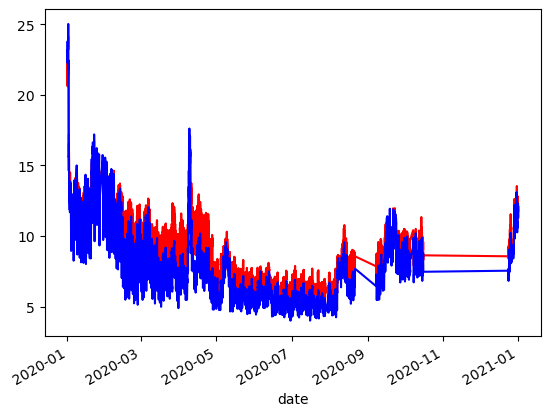

In [64]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [65]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'r2', #
}

In [66]:
df1a.columns

Index(['rowid', 'blh', 'value', 'ssrd', 'v10', 't2m', 'tp', 'd2m', 'tcc',
       'rh2m', 'sp', 'u10', 'date', 'date_unix', 'day_julian', 'weekday',
       'hour', 'set'],
      dtype='object')

In [67]:
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-19 13:14:53 : Training AutoML...
2024-07-19 13:15:53 : Best model is lgbm with best model parameters of {'n_estimators': 308, 'num_leaves': 38, 'min_child_samples': 8, 'learning_rate': 0.25630241340601634, 'log_max_bin': 8, 'colsample_bytree': 0.6884035737993074, 'reg_alpha': 10.880981358662433, 'reg_lambda': 0.2065849656583953}
2024-07-19 13:15:54 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:15:56 : Aggregating 100 predictions...


In [68]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-19 13:15:56 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:16:04 : Aggregating 100 predictions...


In [69]:
#Resampling from given dataset
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-07-19 13:16:04 : Normalising the dataset using the trained model in parallel.
2024-07-19 13:16:11 : Aggregating 100 predictions...


In [70]:
df_dew, mod_stats=normet.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-07-19 13:18:04 : Progress: 20.00% (Model 1/5)... ETA: 7.54 minutes
2024-07-19 13:19:49 : Progress: 40.00% (Model 2/5)... ETA: 5.45 minutes
2024-07-19 13:21:24 : Progress: 60.00% (Model 3/5)... ETA: 3.47 minutes
2024-07-19 13:23:19 : Progress: 80.00% (Model 4/5)... ETA: 1.78 minutes
2024-07-19 13:24:52 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


# Time series decomposition

In [71]:
df_dewca, mod_stats=normet.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-07-19 13:24:52 : Training AutoML...
2024-07-19 13:26:25 : Best model is lgbm with best model parameters of {'n_estimators': 527, 'num_leaves': 57, 'min_child_samples': 19, 'learning_rate': 0.10029209493914669, 'log_max_bin': 10, 'colsample_bytree': 0.777659907533841, 'reg_alpha': 5.054157418960246, 'reg_lambda': 0.023089272254781048}
2024-07-19 13:26:25 : Subtracting base...
2024-07-19 13:26:51 : Subtracting date_unix... ETA: 1.70 minutes
2024-07-19 13:27:16 : Subtracting day_julian... ETA: 1.27 minutes
2024-07-19 13:27:41 : Subtracting weekday... ETA: 50.82 seconds
2024-07-19 13:28:07 : Subtracting hour... ETA: 25.37 seconds


In [72]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.562149,18.770875,2.002855,1.226068,0.632352,23.039445,0.407296
2020-01-01 01:00:00,43.2,9.024405,19.002687,1.978850,1.274462,0.084104,22.209654,-0.130449
2020-01-01 02:00:00,43.0,8.958818,18.741548,1.847375,1.309334,-0.156061,21.546160,-0.196036
2020-01-01 03:00:00,42.8,9.237161,18.692937,1.783656,1.226959,-0.373675,21.412184,0.082307
2020-01-01 04:00:00,36.8,8.284379,18.699566,1.846218,1.230552,-0.302787,20.603074,-0.870474
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.087460,11.528500,0.579929,-0.216366,0.496166,12.320834,-0.067394
2020-12-31 20:00:00,11.0,8.740151,11.512979,0.596395,-0.218192,0.246377,11.722856,-0.414703
2020-12-31 21:00:00,15.3,8.151100,11.882923,0.736818,-0.158879,0.226810,11.683918,-1.003754


In [73]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-19 13:28:32 : Subtracting base...
2024-07-19 13:28:58 : Subtracting date_unix... ETA: 1.71 minutes
2024-07-19 13:29:23 : Subtracting day_julian... ETA: 1.28 minutes
2024-07-19 13:29:48 : Subtracting weekday... ETA: 50.51 seconds
2024-07-19 13:30:13 : Subtracting hour... ETA: 25.11 seconds


In [74]:
df_dewcb, mod_stats=normet.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-19 13:30:37 : Training AutoML...
2024-07-19 13:32:11 : Best model is lgbm with best model parameters of {'n_estimators': 527, 'num_leaves': 57, 'min_child_samples': 19, 'learning_rate': 0.10029209493914669, 'log_max_bin': 10, 'colsample_bytree': 0.777659907533841, 'reg_alpha': 5.054157418960246, 'reg_lambda': 0.023089272254781048}
2024-07-19 13:32:11 : Subtracting deweathered...
2024-07-19 13:32:35 : Subtracting v10... ETA: 4.12 minutes
2024-07-19 13:33:00 : Subtracting u10... ETA: 3.67 minutes
2024-07-19 13:33:24 : Subtracting blh... ETA: 3.25 minutes
2024-07-19 13:33:48 : Subtracting sp... ETA: 2.83 minutes
2024-07-19 13:34:11 : Subtracting rh2m... ETA: 2.41 minutes
2024-07-19 13:34:35 : Subtracting tcc... ETA: 2.00 minutes
2024-07-19 13:34:58 : Subtracting d2m... ETA: 1.59 minutes
2024-07-19 13:35:20 : Subtracting t2m... ETA: 1.18 minutes
2024-07-19 13:35:40 : Subtracting ssrd... ETA: 46.44 seconds
2024-07-19 13:35:59 : Subtracting tp... ETA: 22.82 seconds


In [75]:
df_dewcb, mod_stats=normet.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-19 13:36:18 : Subtracting deweathered...
2024-07-19 13:36:42 : Subtracting v10... ETA: 4.07 minutes
2024-07-19 13:37:07 : Subtracting u10... ETA: 3.66 minutes
2024-07-19 13:37:32 : Subtracting blh... ETA: 3.28 minutes
2024-07-19 13:37:56 : Subtracting sp... ETA: 2.87 minutes
2024-07-19 13:38:20 : Subtracting rh2m... ETA: 2.44 minutes
2024-07-19 13:38:43 : Subtracting tcc... ETA: 2.02 minutes
2024-07-19 13:39:04 : Subtracting d2m... ETA: 1.58 minutes
2024-07-19 13:39:29 : Subtracting t2m... ETA: 1.19 minutes
2024-07-19 13:39:49 : Subtracting ssrd... ETA: 46.90 seconds
2024-07-19 13:40:08 : Subtracting tp... ETA: 23.05 seconds


In [76]:
df_dewcb

,observed,deweathered,v10,u10,blh,sp,rh2m,tcc,d2m,t2m,ssrd,tp,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,23.039445,2.348405,11.538621,9.951762,3.308398,4.872228,5.034381,4.176669,5.402593,4.888450,5.575090,4.201470
2020-01-01 01:00:00,43.2,22.209654,2.083116,10.831902,10.630891,3.909345,2.234880,1.756666,2.263629,3.307464,2.818913,1.914231,-0.729261
2020-01-01 02:00:00,43.0,21.546160,1.934761,10.737967,12.930381,6.157812,1.646541,1.127233,3.001133,3.052042,1.678767,2.590469,-2.211683
2020-01-01 03:00:00,42.8,21.412184,1.768117,8.656889,11.671289,7.860313,2.647513,0.992438,2.564274,3.003262,1.662829,1.040687,-0.165773
2020-01-01 04:00:00,36.8,20.603074,1.836345,7.571450,9.137027,5.060711,1.358711,1.489698,2.266287,2.145058,1.609773,0.858315,-0.928307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.320834,0.330901,0.039283,0.061393,0.690920,0.213027,-0.734549,-1.092745,0.098183,-0.086597,-0.420279,-0.294393
2020-12-31 20:00:00,11.0,11.722856,-0.116136,-0.344297,0.031787,0.857016,0.574518,-0.710404,-1.094372,0.121358,0.049128,-0.452149,-0.194380
2020-12-31 21:00:00,15.3,11.683918,0.270892,-0.034607,0.047285,0.564056,0.060854,-0.744993,-0.998613,0.208369,0.046415,-0.434154,4.057411


In [77]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-19 13:40:28 : Subtracting base...
2024-07-19 13:40:53 : Subtracting date_unix... ETA: 1.70 minutes
2024-07-19 13:41:18 : Subtracting day_julian... ETA: 1.26 minutes
2024-07-19 13:41:43 : Subtracting weekday... ETA: 50.30 seconds
2024-07-19 13:42:08 : Subtracting hour... ETA: 25.14 seconds


In [78]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.562149,18.770875,2.002855,1.034318,0.824102,23.039445,0.407296
2020-01-01 01:00:00,43.2,9.024405,19.002687,1.978850,1.548609,-0.190044,22.209654,-0.130449
2020-01-01 02:00:00,43.0,8.958818,18.741548,1.847375,1.259857,-0.106584,21.546160,-0.196036
2020-01-01 03:00:00,42.8,9.237161,18.692937,1.783656,1.177216,-0.323932,21.412184,0.082307
2020-01-01 04:00:00,36.8,8.284379,18.699566,1.846218,1.317590,-0.389825,20.603074,-0.870474
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.087460,11.528500,0.579929,-0.212619,0.492419,12.320834,-0.067394
2020-12-31 20:00:00,11.0,8.740151,11.512979,0.596395,-0.146246,0.174431,11.722856,-0.414703
2020-12-31 21:00:00,15.3,8.151100,11.882923,0.736818,-0.113853,0.181784,11.683918,-1.003754


# Rolling weather normalisation

In [79]:
df_dewc1, mod_stats=normet.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-07-19 13:42:35 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-19 13:42:55 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 58.73 seconds
2024-07-19 13:43:16 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 38.70 seconds
2024-07-19 13:43:36 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 18.26 seconds


In [80]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,18.317676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.715293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,16.371369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.884565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,16.988155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

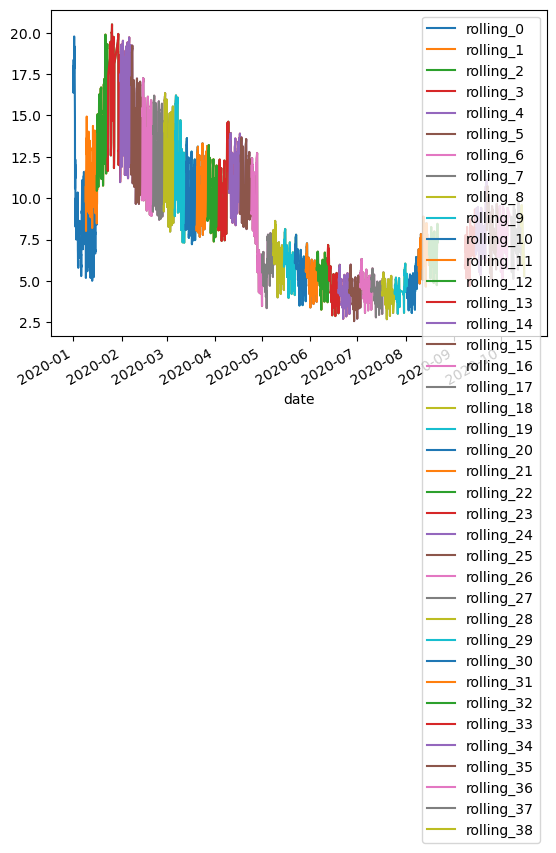

In [81]:
df_dewc1.iloc[:,1:].plot()

In [82]:
df_dewc2, mod_stats=normet.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321)

2024-07-19 13:44:02 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-19 13:44:22 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 57.26 seconds
2024-07-19 13:44:42 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 37.68 seconds
2024-07-19 13:45:01 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 17.82 seconds


In [83]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,22.880670,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,21.908186,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,21.779171,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,21.236211,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,20.564815,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

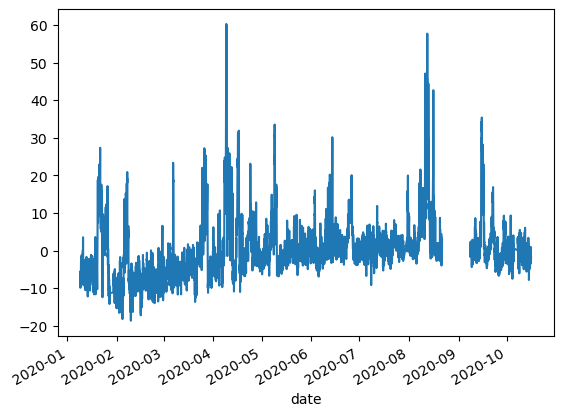

In [84]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

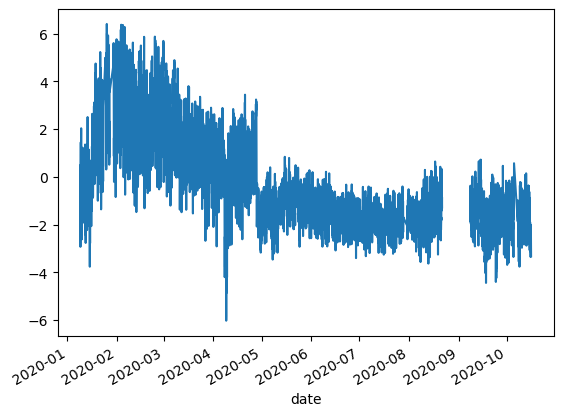

In [85]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [86]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [87]:
df1a

,rowid,blh,value,ssrd,v10,t2m,tp,d2m,tcc,rh2m,sp,u10,date,date_unix,day_julian,weekday,hour,set
0,0,384.209053,58.1,-1.164153e-10,1.545010,278.394725,0.000008,277.183465,0.650958,91.884130,102252.303312,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,353.220263,43.2,-1.164153e-10,1.282742,277.772899,0.000002,276.695430,0.603699,92.715877,102211.168636,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,255.911846,43.0,-1.164153e-10,0.758730,277.463419,0.000005,276.505662,0.710378,93.485560,102174.855967,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,191.375560,42.8,-1.164153e-10,0.509013,277.305813,0.000005,276.412816,0.837765,93.906363,102166.786485,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,151.780210,36.8,-1.164153e-10,0.607069,277.478941,0.000003,276.553051,0.819103,93.696878,102142.578039,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,476.945688,11.7,-5.820766e-11,-1.945195,273.557442,0.000000,272.197565,0.918149,90.582979,99902.506413,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,486.665851,11.0,-5.820766e-11,-2.102732,273.629146,0.000000,272.171041,0.839639,89.939908,99947.625909,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,489.355002,15.3,-5.820766e-11,-1.933668,273.470592,0.000000,272.087408,0.739354,90.422188,100000.215520,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,40.714872,17.1,-5.820766e-11,-0.583816,272.926062,0.000000,272.235319,0.643753,95.088677,100042.844978,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [88]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features, variables=['blh'])

In [89]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,16.120447,8.629124
1,blh,88.917320,16.084343,8.637972
2,blh,104.418730,15.185270,8.949905
3,blh,119.920140,15.321164,8.438337
4,blh,135.421549,13.964132,7.634381
...,...,...,...,...
95,blh,1546.049822,6.850006,4.699215
96,blh,1561.551231,6.873179,4.702187
97,blh,1577.052641,6.902885,4.702035
98,blh,1592.554051,6.929586,4.698523


In [90]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features, variables=['blh','t2m'])

In [91]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,16.120447,8.629124
1,blh,88.917320,16.084343,8.637972
2,blh,104.418730,15.185270,8.949905
3,blh,119.920140,15.321164,8.438337
4,blh,135.421549,13.964132,7.634381
...,...,...,...,...
195,t2m,294.518468,10.723483,7.654776
196,t2m,294.715875,10.718646,7.647077
197,t2m,294.913281,10.730173,7.648271
198,t2m,295.110688,10.730225,7.646679


In [92]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features)

In [93]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,12.170650,8.146242
1,u10,-4.242993,12.222611,8.171427
2,u10,-4.131954,12.095116,8.171578
3,u10,-4.020915,12.095460,8.173764
4,u10,-3.909875,12.247254,8.173514
...,...,...,...,...
1226,hour,19.000000,9.713959,7.450143
1227,hour,20.000000,9.610362,7.441694
1228,hour,21.000000,9.314376,7.430700
1229,hour,22.000000,9.105398,7.471256
